In [3]:
import subprocess

In [4]:
result = subprocess.run("./run_benchmarks.sh", stdout=subprocess.PIPE)

In [5]:
lsm_tree_benchmarks = {}
rocksdb_benchmarks = {}

def extract_benchmark_and_time(line):
    benchmark = line.split(" ", 1)[1].split(":")[0]
    time = int(line.split(":")[1][1:].split("[")[0]) / 1000
    return benchmark, time

for line in result.stdout.decode("utf-8").split("\n"):
    print(line)
    
    if line.startswith("LSM-TREE"):
        benchmark, time = extract_benchmark_and_time(line)
        lsm_tree_benchmarks[benchmark] = time
        
    elif line.startswith("ROCKSDB"):
        benchmark, time = extract_benchmark_and_time(line)
        rocksdb_benchmarks[benchmark] = time
        
print(lsm_tree_benchmarks)
print(rocksdb_benchmarks)

Your client ID: sqMjQN
Share and monitor it live from https://cli2cloud.com/sqMjQN

make: Entering directory '/home/leon/Projects/LSM-Tree/build'
make[1]: Entering directory '/home/leon/Projects/LSM-Tree/build'
make[2]: Entering directory '/home/leon/Projects/LSM-Tree/build'
make[2]: Leaving directory '/home/leon/Projects/LSM-Tree/build'
make[2]: Entering directory '/home/leon/Projects/LSM-Tree/build'
[  9%] Building CXX object src/CMakeFiles/lsm-tree.dir/lsm_tree/lsm_tree.cpp.o
[ 18%] Linking CXX static library liblsm-tree.a
make[2]: Leaving directory '/home/leon/Projects/LSM-Tree/build'
[ 63%] Built target lsm-tree
make[2]: Entering directory '/home/leon/Projects/LSM-Tree/build'
make[2]: Leaving directory '/home/leon/Projects/LSM-Tree/build'
make[2]: Entering directory '/home/leon/Projects/LSM-Tree/build'
[ 72%] Building CXX object CMakeFiles/kv_store.dir/kv_store.cpp.o
[ 81%] Linking CXX executable kv_store
make[2]: Leaving directory '/home/leon/Projects/LSM-Tree/build'
[ 81%] Built

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 25})

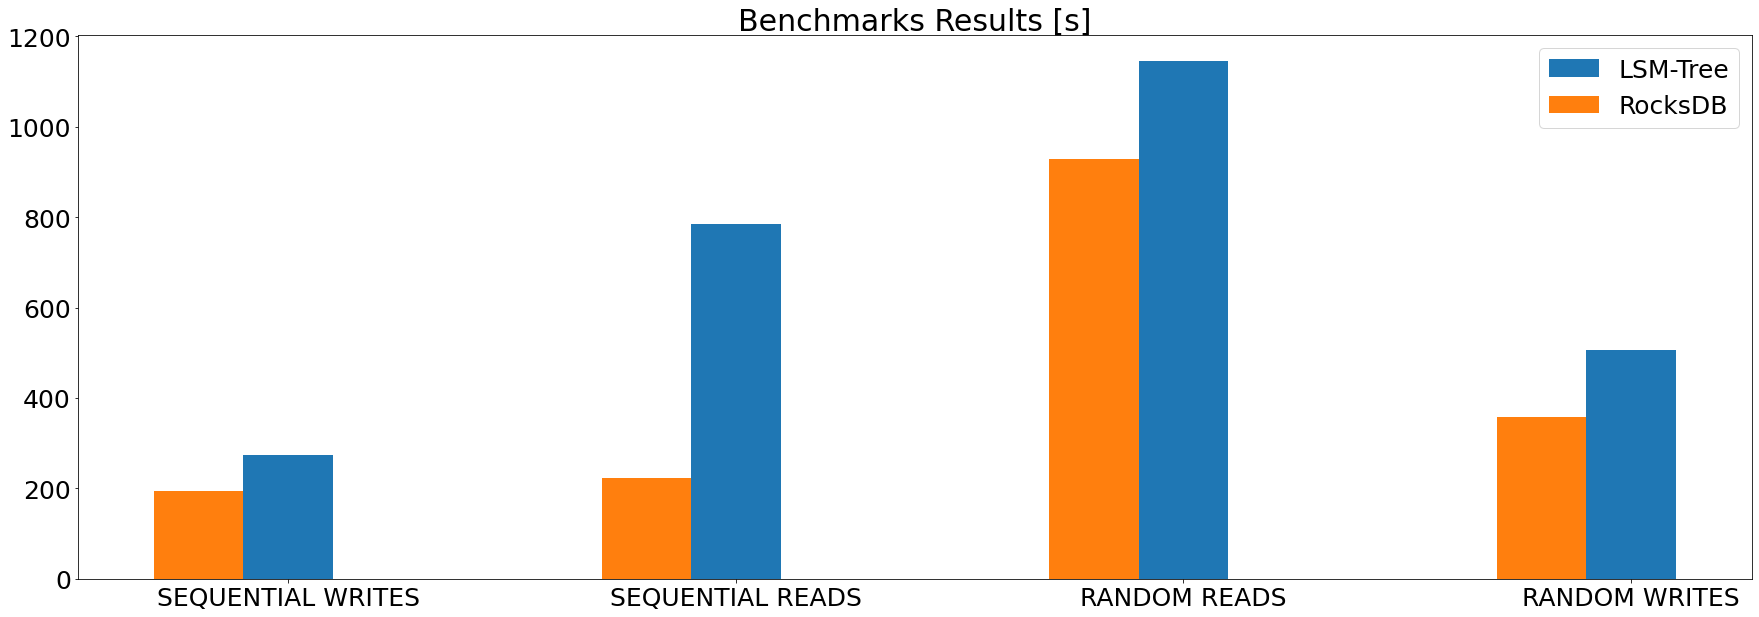

In [7]:
X = np.arange(len(lsm_tree_benchmarks))
ax = plt.subplot(111)
ax.bar(X, lsm_tree_benchmarks.values(), width=0.2, align='center')
ax.bar(X-0.2, rocksdb_benchmarks.values(), width=0.2, align='center')
ax.legend(('LSM-Tree','RocksDB'))
plt.xticks(X, lsm_tree_benchmarks.keys())
plt.title("Benchmarks Results [s]", fontsize=30)
plt.show()


For each benchmark, `100 Million` key value pairs have been inserted or retrieved from each database. 
For the sequential benchmarks, they either got written to or read from starting at `{0, 0}` up until `{99999999, 99999999}`.
For the random benchmarks, random numbers have been generated in the interval `[0, 99999999]`, which then have been written to or read from the databases.